# Lab 2: E-tivity 2: Data Preparation

**Task 3**

Open a new Jupyter notebook and name it etivity2.ipynb. In your notebook, load bank.csv into a Pandas dataframe. Follow the examples and process in Lab 2 - Data Preparation.ipynb to prepare bank.csv for machine learning.

Ensure that you have:
* encoded all categorical attributes as numerical,
* filled in all missing values
* applied a scaler to rescale features
* treated outliers appropriately
* created at least one new feature from the existing ones.

In the end, save the prepared dataset as a CSV file on your hard disk.

## A. Importing required modules and dataset

In [1]:
# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('./bank.csv')

## B. Data Exploration

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Checking missing values

In [5]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

**Missing data:** age, education, contact and poutcome

In [6]:
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

In [7]:
# Make a copy of the original data
df_original = df

## C. One-Hot Encode categorical attributes

In [8]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['marital', 'education', 'housing', 'loan', 'contact'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,job,default,balance,day,month,duration,campaign,pdays,previous,...,marital_nan,education_secondary,education_tertiary,education_nan,housing_yes,housing_nan,loan_yes,loan_nan,contact_telephone,contact_nan
1995,20.0,student,no,2785,16,sep,327,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
1996,28.0,admin.,no,127,16,sep,1334,2,-1,0,...,0,1,0,0,0,0,0,0,0,0
1997,81.0,retired,no,1154,17,sep,231,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,services,no,4343,20,sep,185,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1999,40.0,entrepreneur,no,6403,22,sep,208,2,-1,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                     12
job                     10
default                  0
balance                  0
day                      0
month                    0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome               454
subscribed               0
marital_married          0
marital_single           0
marital_nan              0
education_secondary      0
education_tertiary       0
education_nan            0
housing_yes              0
housing_nan              0
loan_yes                 0
loan_nan                 0
contact_telephone        0
contact_nan              0
dtype: int64

In [10]:
len(df)

2000

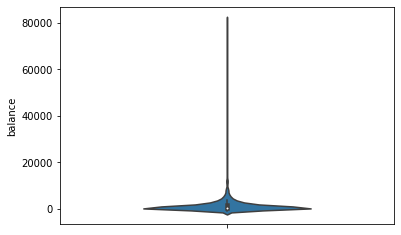

In [11]:
#Violin plot for balance

sns.violinplot(x=df['balance'], orient='v', width=0.5)
plt.show()


We should try normalize it as we have outlier